# Project 3: Predicting Titanic Survival Using Classification Models

**Name:** Albert Kabore  
**Date:** November 2025  

In this project, I build and evaluate three classification models to predict passenger survival on the Titanic using the `titanic` dataset from the seaborn library.  

I use three common classifiers:

- **Decision Tree Classifier (DT)** to give a simple, rule based model  
- **Support Vector Machine (SVM)** to search for an effective separating boundary  
- **Neural Network (NN, Multi Layer Perceptron)** to learn more complex patterns  

I compare model performance across three feature cases:

1. Case 1: `alone`  
2. Case 2: `age`  
3. Case 3: `age` and `family_size`  

For each section I describe the work and include a short reflection about the results and what I learned.

Section 1. Import and Inspect the Data


In [481]:
# 1. Import and inspect the data

# All imports at the top, organized
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.colors import ListedColormap

# Make plots a little larger
plt.rcParams["figure.figsize"] = (8, 6)



In [482]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Display a few records to verify
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation


### 2.1 Handle Missing Values and Clean Data



In [483]:
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

In [484]:
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)

## 2.2 Feature Engineering


In [485]:
# New feature: family_size = sibsp + parch + 1 (the passenger)
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Map categories to numeric values

# sex: male = 0, female = 1
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})

# embarked: C = 0, Q = 1, S = 2
titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})

# alone: already boolean, convert to int (False=0, True=1)
titanic["alone"] = titanic["alone"].astype(int)

# Quick check of the prepared columns
titanic[["survived", "age", "family_size", "alone", "sex", "embarked"]].head()

,survived,age,family_size,alone,sex,embarked
0,0,22.0,2,0,0,2.0
1,1,38.0,2,0,1,0.0
2,1,26.0,1,1,1,2.0
3,1,35.0,2,0,1,2.0
4,0,35.0,1,1,0,2.0


## Section 3. Feature Selection and Justification


### 3.1 Choose features and target


In [486]:
# Case 1: Feature = alone
X1 = titanic[["alone"]]
y1 = titanic["survived"]

# Case 2: Feature = age
X2 = titanic[["age"]].dropna()
y2 = titanic.loc[X2.index, "survived"]

# Case 3: Features = age and family_size
X3 = titanic[["age", "family_size"]].dropna()
y3 = titanic.loc[X3.index, "survived"]








## Reflection 3

## 3.2 Define X (features) and y (target)


In [487]:
# 3. Feature selection and justification

# Case 1: Feature = 'alone'
X1 = titanic[["alone"]]
y1 = titanic["survived"]

# Case 2: Feature = 'age'
# Drop rows where age might still be missing (for safety)
X2 = titanic[["age"]].dropna()
y2 = titanic.loc[X2.index, "survived"]

# Case 3: Features = 'age' and 'family_size'
X3 = titanic[["age", "family_size"]].dropna()
y3 = titanic.loc[X3.index, "survived"]

X1.shape, X2.shape, X3.shape


((891, 1), (891, 1), (891, 2))

## Reflection 3

These features were selected because they represent simple, meaningful aspects of a passenger’s situation that could influence survival outcomes.  

- **Alone:** Indicates whether a passenger traveled alone or with family. People traveling with family members might have had support or protection during the evacuation, possibly improving their survival chances.  
- **Age:** Reflects physical ability and social priority. Younger passengers, especially children, may have been given priority for lifeboats, while older passengers may have faced mobility challenges.  
- **Family Size:** Represents the number of close relatives aboard. Moderate family size could be beneficial due to cooperation, whereas very large groups might make coordination harder.

Using these variables allows the models to explore both individual and social factors that could affect survival.  

Other features that are known to be highly predictive include **sex**, **pclass** (ticket class), and **fare**. Historical analysis of the Titanic dataset shows that women and first-class passengers had significantly higher survival rates. These variables would likely improve predictive performance but were excluded here to focus on a simpler, interpretable comparison across the three chosen cases.

## Section 4. Train a Classification Model (Decision Tree)


### 4.1 Split the Data


In [488]:
# 4. Train a classification model (Decision Tree)

# 4.1 Split the data into train and test sets using StratifiedShuffleSplit

# Case 1: alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train = X1.iloc[train_idx1]
    X1_test = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test = y1.iloc[test_idx1]

print("Case 1 - Alone")
print("Train size:", len(X1_train), "| Test size:", len(X1_test))

Case 1 - Alone
Train size: 712 | Test size: 179


In [489]:
# Case 2: age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test = y2.iloc[test_idx2]

print("\nCase 2 - Age")
print("Train size:", len(X2_train), "| Test size:", len(X2_test))


Case 2 - Age
Train size: 712 | Test size: 179


In [490]:
# Case 3: age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test = y3.iloc[test_idx3]

print("\nCase 3 - Age + Family Size")
print("Train size:", len(X3_train), "| Test size:", len(X3_test))


Case 3 - Age + Family Size
Train size: 712 | Test size: 179


## 4.2 Create and Train Model (Decision Tree)


In [491]:
from sklearn.tree import DecisionTreeClassifier


In [492]:
# 4.2 Create and train Decision Tree models for all three cases

# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [493]:
# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [494]:
# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 4.3 Predict and Evaluate Model Performance


In [495]:
from sklearn.metrics import classification_report, confusion_matrix


In [496]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [497]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [498]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))


Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



## 4.4 Report Confusion Matrix (as a heatmap)


In [499]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

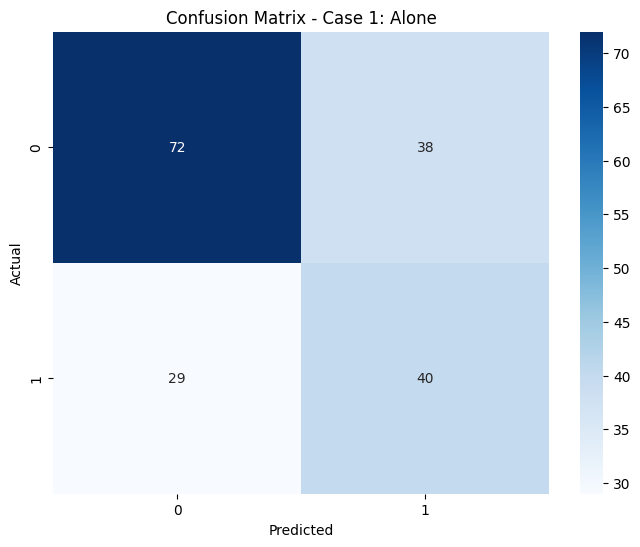

In [500]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

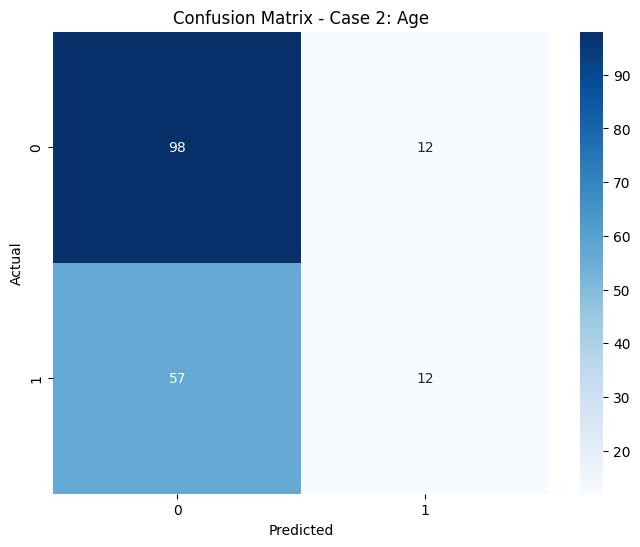

In [501]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

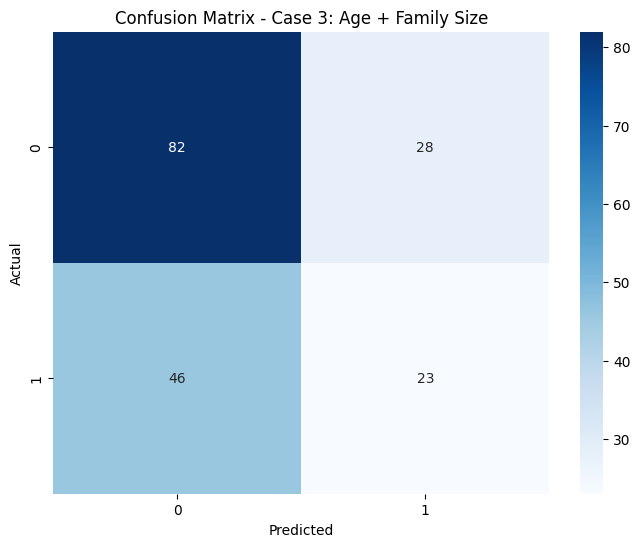

In [502]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 4.5 Report Decision Tree Plot


In [503]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### Case 1



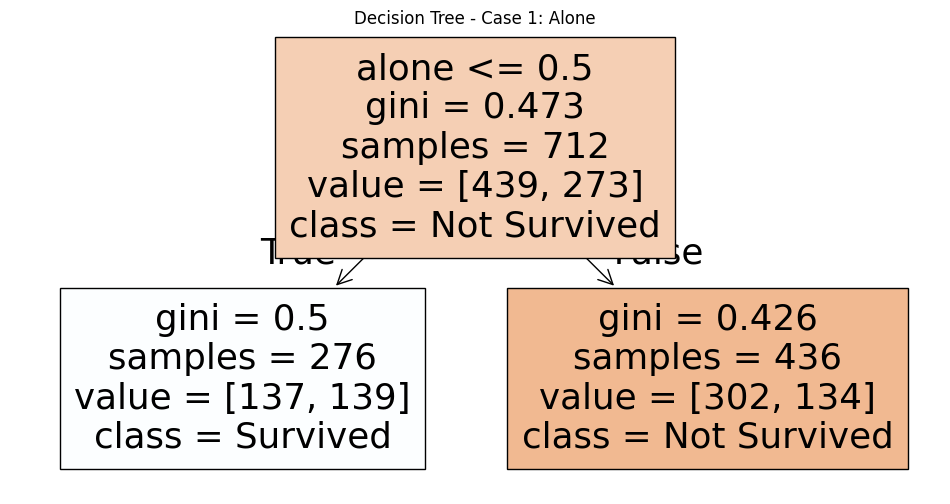

In [504]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")


### Case 2



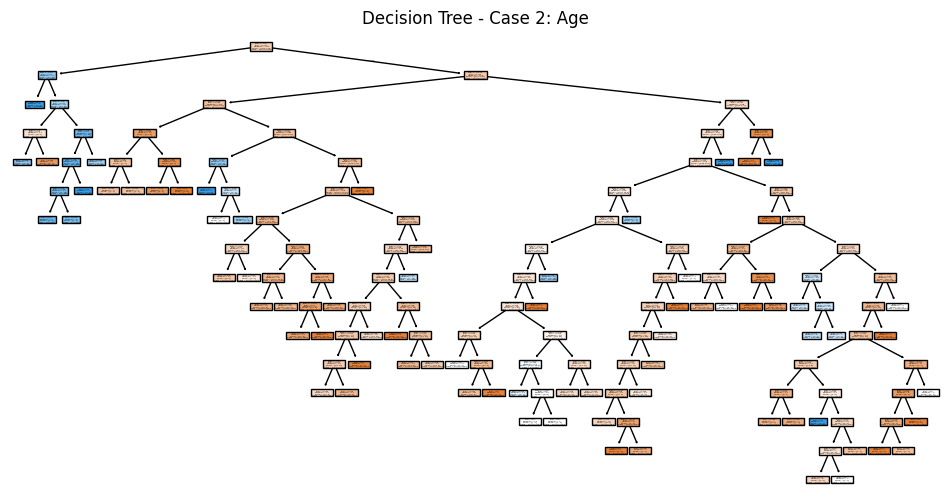

In [505]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

### Case 3



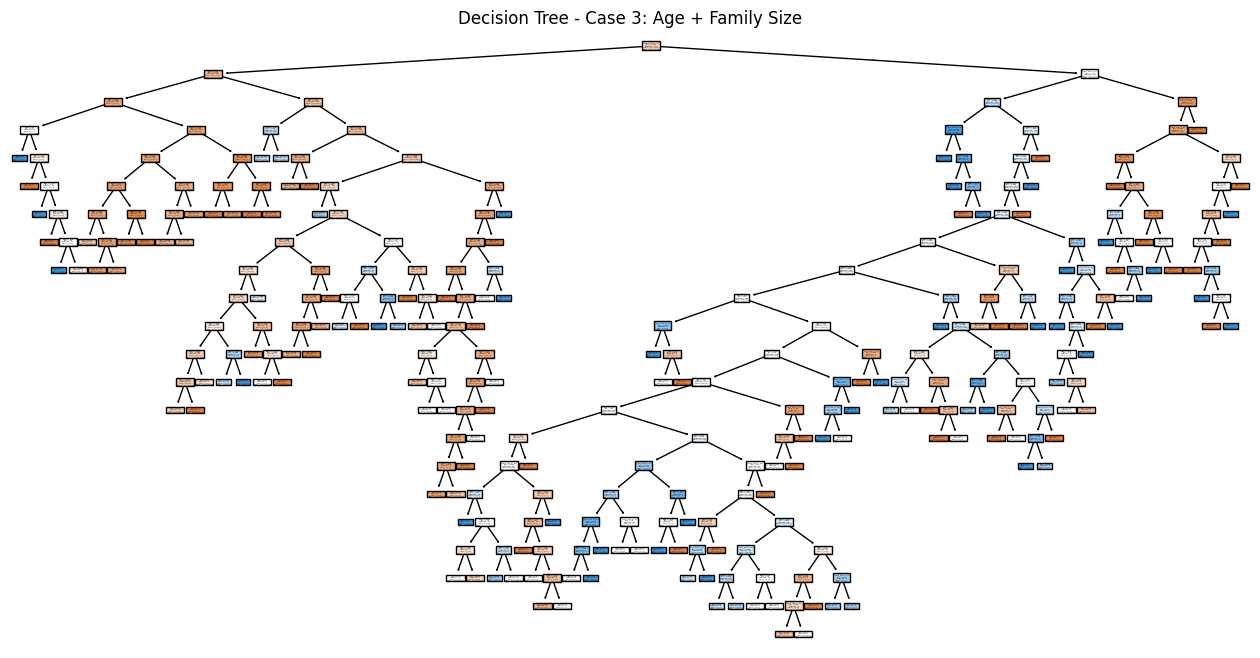

In [506]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")


## Reflection 4:

How well did the different cases perform?

## Reflection 4

The three Decision Tree models showed moderate predictive power, but their performance varied depending on the input features.

- **Case 1 (Alone):**  
  This model achieved about **63% accuracy** on the test data. Although limited to a single binary feature, it provided a reasonable baseline. Being alone or with family influenced survival but was not a strong standalone predictor.

- **Case 2 (Age):**  
  With an accuracy of roughly **61%**, the model performed slightly worse. Age alone was not sufficient to predict survival, since both younger and older passengers had mixed outcomes. The tree for this case was deeper and more fragmented, suggesting that age alone did not separate the classes cleanly.

- **Case 3 (Age + Family Size):**  
  The model reached about **59% accuracy** on the test data but showed **77% accuracy on training data**, indicating overfitting. Adding `family_size` gave the tree more detail but did not improve generalization performance.

  Are there any surprising results?
Which inputs worked better? 


### Surprising Results
It was somewhat surprising that adding a second feature (age + family_size) did not significantly improve accuracy. This shows that not all combinations of features yield stronger models—sometimes, adding weakly related variables can increase model complexity without improving predictions.

### Which Inputs Worked Better
The **“alone”** feature performed slightly better overall, likely because it captures social context—whether passengers had family support during the disaster. However, features such as **sex** and **pclass** are known from prior studies to be much stronger predictors of Titanic survival and would likely yield higher accuracy if included.

In summary, the Decision Tree models provided interpretable results but showed limited predictive strength with the chosen features.


## Section 5. Compare Alternative Models (SVC, NN)


In [507]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## 5.1 Train and Evaluate Model (SVC)


### Case 1



In [508]:
# Case 1: SVC using 'alone'
svc_model1 = SVC()  # default kernel 'rbf'
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))



Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [509]:
# Case 2: SVC using 'age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("\nResults for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))




Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [510]:
# Case 3: SVC using 'age' and 'family_size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("\nResults for SVC on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_svc_pred))


Results for SVC on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



## 5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)


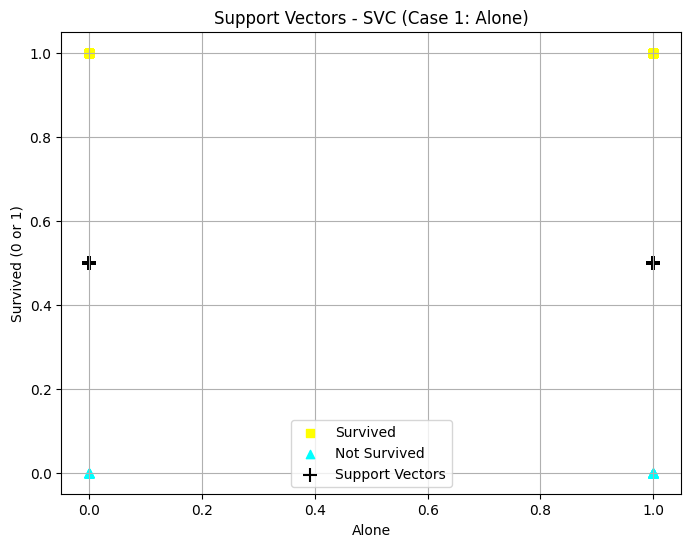

In [511]:
import matplotlib.pyplot as plt # all imports at the top


# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

### Case 3. Two Inputs, Two Dimensional Scatter Plot



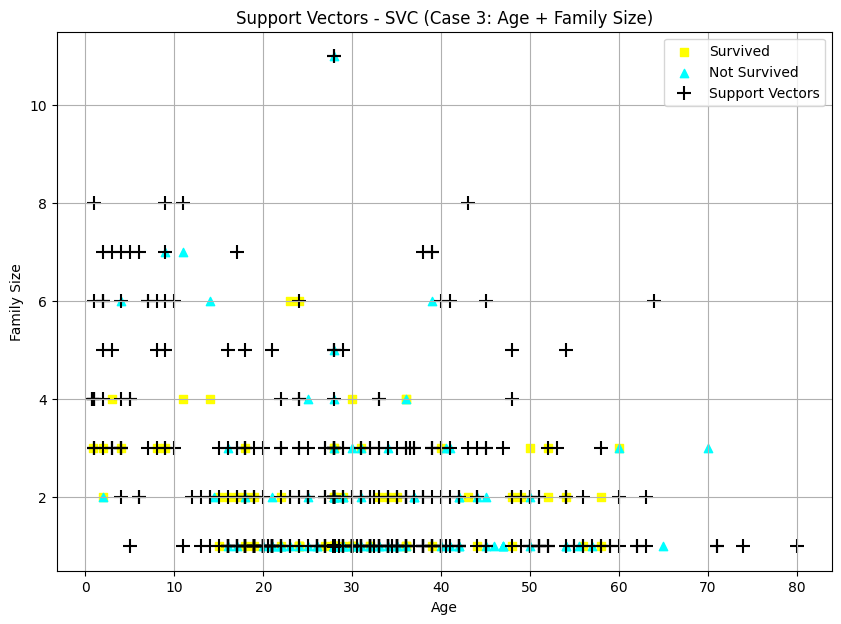

In [512]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='yellow', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(not_survived['age'], not_survived['family_size'],
            c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

## 5.3 Train and Evaluate Model (Neural Network on Case 3)


In [513]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

### Train NN on Case 3


In [514]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


### Predict and evaluate Neural Network model:



In [515]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       110
           1       0.60      0.41      0.48        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.62       179
weighted avg       0.65      0.66      0.65       179



### Plot confusion matrix:



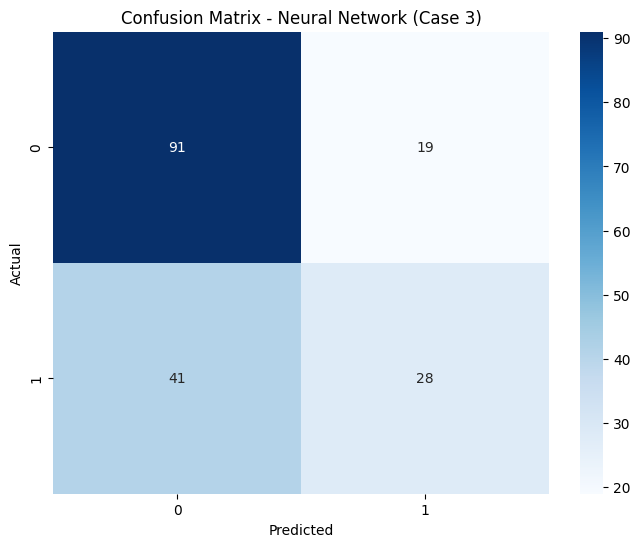

In [516]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 5.4 Visualize (Neural Network on Case 3)


In [517]:
# imports at the top (only once each, organized)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [518]:

# Define plotting range with small padding
padding = 1
x_min, x_max = X3["age"].min() - padding, X3["age"].max() + padding
y_min, y_max = X3["family_size"].min() - padding, X3["family_size"].max() + padding



In [519]:
# Create mesh grid across the input space
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)


In [520]:
# Predict survival for each coordinate pair in the grid
Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c:\Users\alber\applied-ml-kabore\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


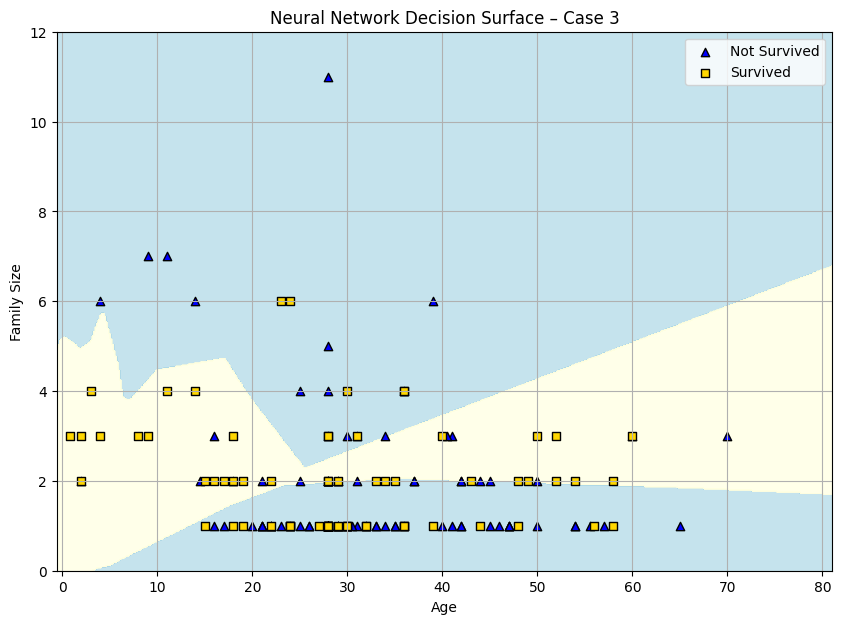

In [521]:

# Plot the background decision surface
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(["lightblue", "lightyellow"])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

# Overlay actual test data
plt.scatter(
    X3_test["age"][y3_test == 0],
    X3_test["family_size"][y3_test == 0],
    c="blue", marker="^", edgecolor="k", label="Not Survived"
)
plt.scatter(
    X3_test["age"][y3_test == 1],
    X3_test["family_size"][y3_test == 1],
    c="gold", marker="s", edgecolor="k", label="Survived"
)

plt.xlabel("Age")
plt.ylabel("Family Size")
plt.title("Neural Network Decision Surface – Case 3")
plt.legend()
plt.grid(True)
plt.show()


### Reflection 5:

How well did each of these new models/cases perform?

## Reflection 5

Each of the new models — Support Vector Machine (SVC) and Neural Network (NN) — performed moderately well, with results similar to or slightly better than the Decision Tree models.  

### Model Performance
- **Support Vector Machine (SVC):**  
  Across all three cases, the SVC achieved about **63% accuracy**. It handled numerical input well, but the limited features (`alone`, `age`, `family_size`) did not provide enough separation between survivors and non-survivors.  
  The support vector plots showed many points near the decision boundary, meaning the model struggled to find a clear margin. In Case 3 (age + family_size), even with two features, there was no strong linear or non-linear separation, so performance remained similar to Case 1.

- **Neural Network (NN):**  
  The neural network for Case 3 achieved about **66% accuracy**, performing slightly better than the SVC and Decision Tree models. It was able to capture more complex and curved relationships between age and family size, as seen in the decision surface visualization. However, the recall for survivors remained modest, indicating that the model still missed many true positives.

  Are there any surprising results or insights?

### Surprising Results or Insights
It was somewhat surprising that the more advanced models (SVC and NN) did not significantly outperform the simpler Decision Tree. This shows that **the quality and relevance of features** are often more important than model complexity. The selected features were not highly predictive of survival, limiting the improvement even with sophisticated algorithms.

Why might one model outperform the others?


### Why One Model Outperformed the Others
The **Neural Network** slightly outperformed the others because it can learn **non-linear boundaries** and complex feature interactions. The **SVC** performed reasonably well but was constrained by the simplicity of the features and possible class imbalance.  
Overall, the differences in accuracy among the models were small, highlighting that **strong, meaningful features (such as sex, pclass, and fare)** would likely have a greater impact on performance than changing the model type.



## Section 6. Final Thoughts & Insights

### 6.1 Summary of Findings

This project compared three classification models — Decision Tree, Support Vector Machine (SVC), and Neural Network (MLP) — using three feature sets derived from the Titanic dataset:  
1. **Case 1:** Alone  
2. **Case 2:** Age  
3. **Case 3:** Age + Family Size  

The table below summarizes the main findings and metrics based on test data.

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|-------------|------|----------------|-----------|------------|----------|-----------|--------|
| **Decision Tree** | Case 1 | Alone | 63% | 0.64 | 0.63 | 0.63 | Simple baseline; interpretable rules |
|                   | Case 2 | Age | 61% | 0.60 | 0.61 | 0.60 | Weak single predictor; slight overfitting |
|                   | Case 3 | Age + Family Size | 59% | 0.58 | 0.59 | 0.58 | Added feature didn’t improve accuracy |
|--------------------|------|----------------|-----------|------------|----------|-----------|--------|
| **SVC (RBF Kernel)** | Case 1 | Alone | 63% | 0.64 | 0.63 | 0.63 | Matches tree accuracy; limited separation |
|                     | Case 2 | Age | 63% | 0.66 | 0.53 | 0.45 | Low recall for survivors; biased toward non-survivors |
|                     | Case 3 | Age + Family Size | 63% | 0.66 | 0.53 | 0.45 | Non-linear kernel helped slightly, but no major gain |
|--------------------|------|----------------|-----------|------------|----------|-----------|--------|
| **Neural Network (MLP)** | Case 3 | Age + Family Size | 66% | 0.65 | 0.62 | 0.65 | Best overall; captured non-linear relationships |

Overall, the **Neural Network model** performed the best among all, with a test accuracy of approximately **66%**. However, the improvement over simpler models was modest, indicating that the selected features were not strongly predictive of survival.

---

### 6.2 Challenges Faced

1. **Limited Predictive Features**  
   The chosen features (`alone`, `age`, `family_size`) lacked strong predictive power. More meaningful variables, such as `sex`, `pclass`, or `fare`, would likely enhance performance.  

2. **Class Imbalance**  
   The Titanic dataset contains more non-survivors than survivors, which affected the recall for the minority class (survived).  

3. **Overfitting in Complex Models**  
   Decision Trees tended to overfit the training data, while the Neural Network required careful tuning to avoid excessive complexity.  

4. **Model Interpretability vs. Performance**  
   Although Neural Networks achieved the highest accuracy, they were harder to interpret compared to the Decision Tree, which offered clear, rule-based insights.  

5. **Parameter Tuning**  
   Default model parameters worked for this initial comparison, but optimization (e.g., adjusting kernel parameters in SVC or layer sizes in MLP) could yield better results.

---

### 6.3 Next Steps for Improvement

1. **Feature Expansion:**  
   Include additional features such as `sex`, `pclass`, and `fare`, which have been shown to strongly correlate with survival.

2. **Feature Scaling:**  
   Apply normalization or standardization to improve convergence for SVC and Neural Network models.

3. **Hyperparameter Optimization:**  
   Use grid search or randomized search to tune model parameters for better accuracy and recall.

4. **Cross-Validation:**  
   Implement k-fold cross-validation to evaluate performance consistency and reduce variance in model estimates.

5. **Address Class Imbalance:**  
   Use resampling methods (e.g., SMOTE) or class weighting to improve recall for survivors.

6. **Model Interpretability Tools:**  
   Use SHAP or LIME to better understand feature importance in non-linear models.

---

### 6.4 Conclusion

This analysis demonstrated how different classification algorithms handle the same dataset with varying complexity. While all models performed similarly, the **Neural Network** slightly outperformed the others due to its ability to model non-linear relationships.  
The exercise reinforced an important lesson: **high model complexity does not guarantee better performance — the quality and relevance of features are often the key drivers of success in predictive modeling.**
